# Data Loading and Preprocessing

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# data augmentation and normalization
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)
# Loading training, validation, and testing datasets
train_data = data_gen.flow_from_directory(
    'data/train',
    target_size=(64, 64),
    batch_size=64,
    subset='training'
)

val_data = data_gen.flow_from_directory(
    'data/val',
    target_size=(64, 64),
    batch_size=64,
    subset='validation'
)

test_data = data_gen.flow_from_directory(
    'data/test',
    target_size=(64, 64),
    batch_size=64
)

Found 634 images belonging to 2 classes.
Found 19 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


# Convolutional Neural Network

In [6]:
model = models.Sequential()

# first convolutional block
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(64, 64, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# second
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# third
model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# fourth 
model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# flattening and dense layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))

# Model summary
model.summary()

/Users/Skele/Documents/I320D Applied ML/PROJ/Jivianne/.venv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,726,626 (10.40 MB)

 Trainable params: 2,726,562 (10.40 MB)

 Non-trainable params: 64 (256.00 B)

# Compiling and Training

In [7]:
# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Training the model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

# Save the model
model.save("modelCNN.keras")

/Users/Skele/Documents/I320D Applied ML/PROJ/Jivianne/.venv/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 295ms/step - accuracy: 0.5033 - loss: 2.1926 - val_accuracy: 0.5263 - val_loss: 0.6915
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 272ms/step - accuracy: 0.5568 - loss: 0.6810 - val_accuracy: 0.4737 - val_loss: 0.6952
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 270ms/step - accuracy: 0.6502 - loss: 0.6465 - val_accuracy: 0.4737 - val_loss: 0.6978
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 271ms/step - accuracy: 0.7164 - loss: 0.5890 - val_accuracy: 0.4737 - val_loss: 0.7040
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 262ms/step - accuracy: 0.7902 - loss: 0.4948 - val_accuracy: 0.4737 - val_loss: 0.7145
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 260ms/step - accuracy: 0.8641 - loss: 0.3728 - val_accuracy: 0.4737 - val_loss: 0.7643
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 261ms/step - accuracy: 0.8794 - loss: 0.2794 - val_accuracy: 0.4737 - val_loss: 0.8009
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - accuracy: 0.9464 - loss: 0.1511 - val_accuracy: 0.

In [8]:
# USE IF NEEDED
from tensorflow.keras.models import load_model
model = load_model("modelCNN.keras")

In [9]:
# model accuracy on test data
test_loss, test_accuracy = model.evaluate(test_data)
print(f"Test Accuracy: {test_accuracy:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.7538 - loss: 0.5377
Test Accuracy: 0.7400


In [10]:
#OTHER STATS
from sklearn.metrics import classification_report
import numpy as np

# Get predictions and true labels from the test dataset
true_classes = []
predicted_classes = []

# Iterate over the test_data generator
for _ in range(len(test_data)):
    images, labels = next(test_data)  # Get a batch of data

    # True labels
    true_classes.extend(np.argmax(labels, axis=1))  # Convert one-hot encoded labels to class indices

    # Predictions
    predictions = model.predict(images)
    predicted_classes.extend(np.argmax(predictions, axis=1))  # Convert probabilities to class indices

# Generate and display the classification report
report = classification_report(true_classes, predicted_classes, target_names=["Class 0", "Class 1"])
print(report)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
              precision    recall  f1-score   support

     Class 0       0.66      0.94      0.77        47
     Class 1       0.91      0.57      0.70        53

    accuracy                           0.74       100
   macro avg       0.78      0.75      0.73       100
weighted avg       0.79      0.74      0.73       100



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


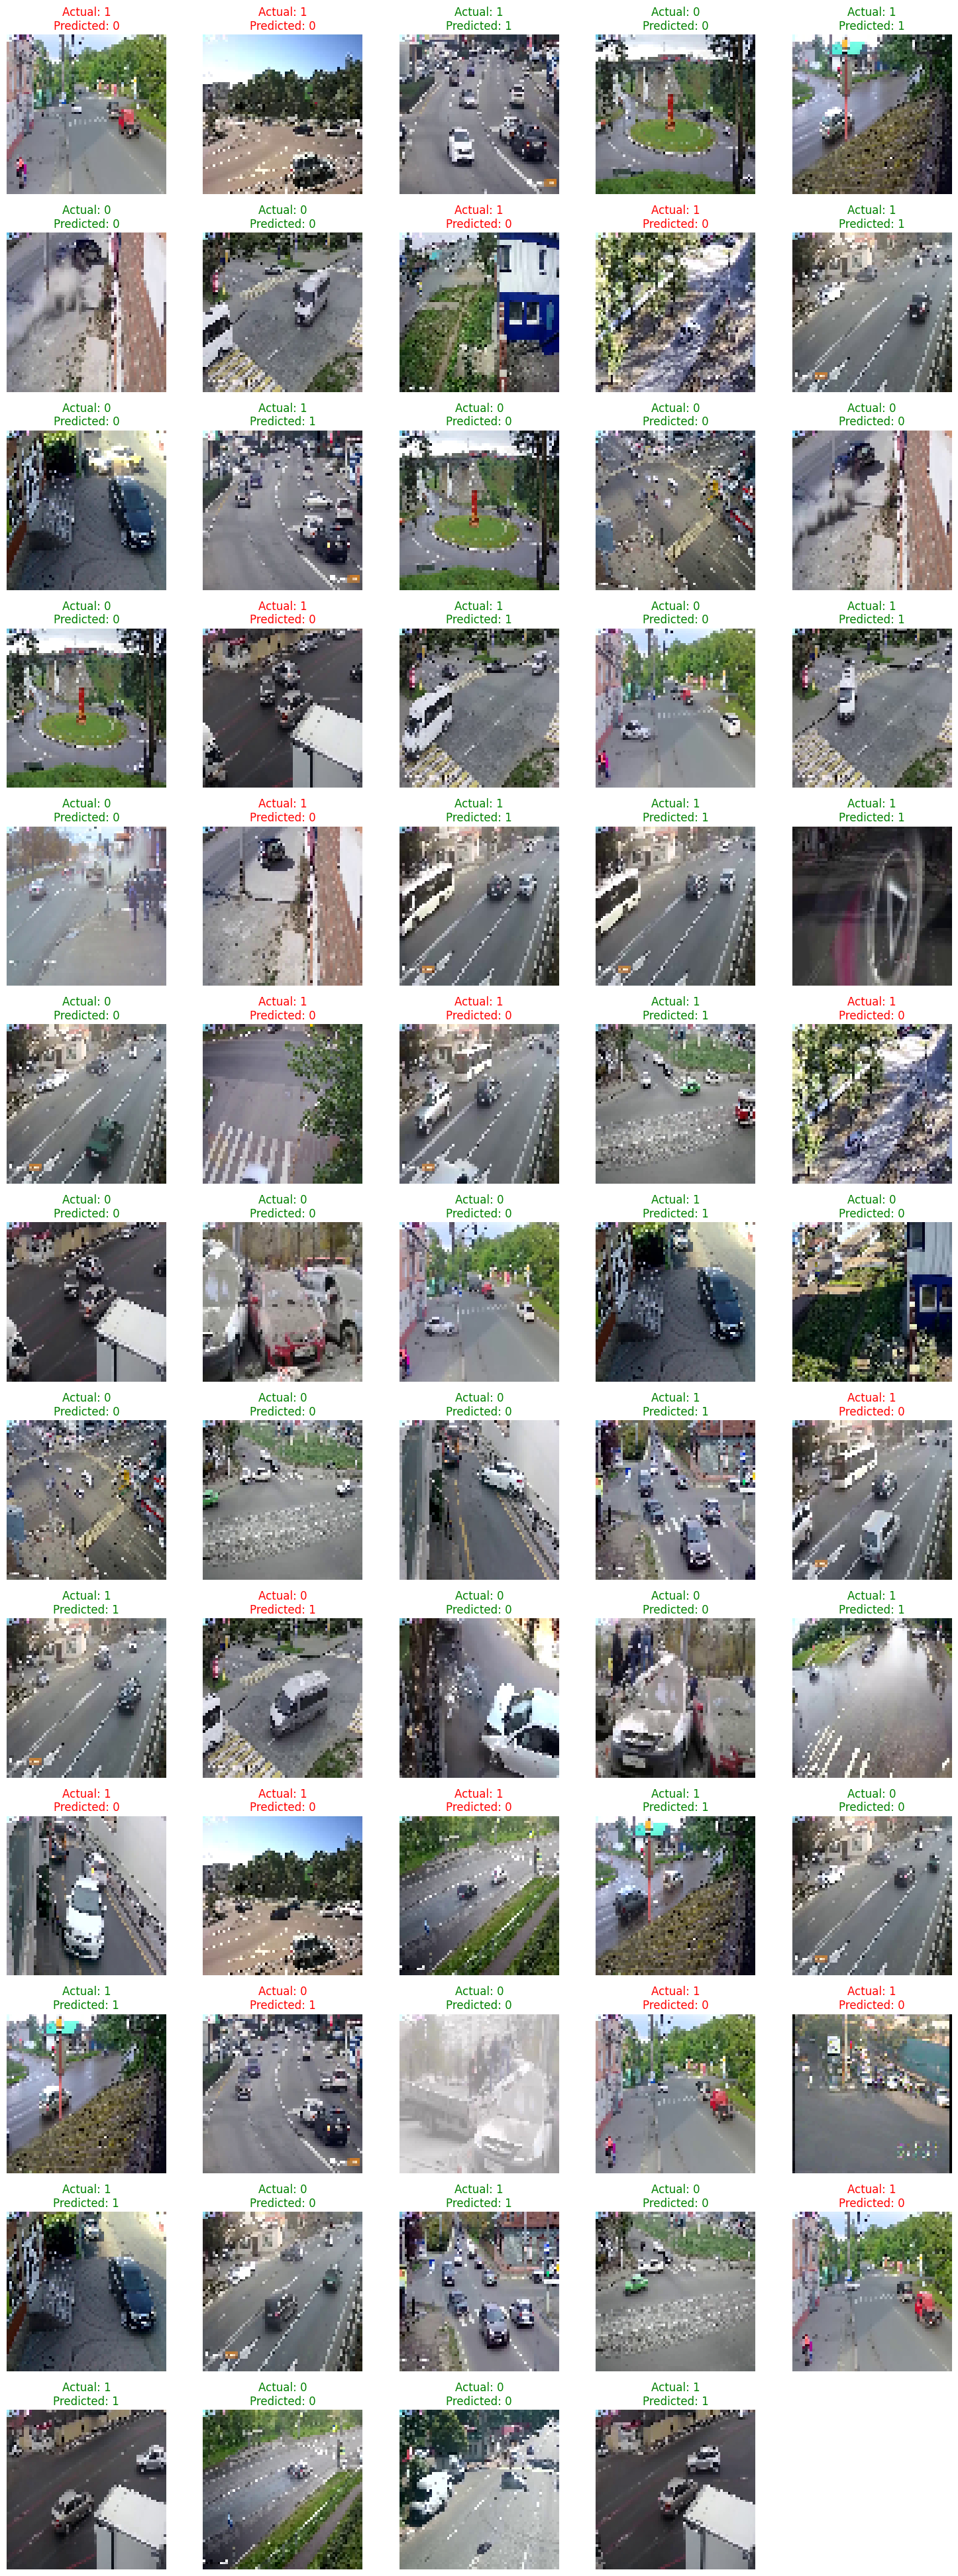

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of test data (images and labels)
images, labels = next(test_data)

# Generate predictions for the batch
predictions = model.predict(images)

# Decode actual labels and predictions
actual_classes = np.argmax(labels, axis=1)  # Convert one-hot encoded labels to class indices
predicted_classes = np.argmax(predictions, axis=1)  # Convert probabilities to class indices

# Plot a few images along with their actual and predicted labels
num_images = 64  # Number of images to display

# Dynamically calculate figsize
rows = (num_images // 5) + (num_images % 5 > 0)  # 5 images per row
figsize = (15, rows * 3)  # Width fixed, height adjusts with rows

plt.figure(figsize=figsize)  # Dynamically set the figure size

for i in range(num_images):
    plt.subplot(rows, 5, i + 1)  # 5 images per row
    plt.imshow(images[i])  # Display the image
    plt.axis('off')  # Turn off axis for better visuals
    plt.title(
        f"Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}",
        color="green" if actual_classes[i] == predicted_classes[i] else "red"  # Color-code correct/incorrect
    )

plt.tight_layout()
plt.show()